### **Insurance Price prediction Project**

##### The factors that infuance the insurance price 


In this project we'll go through the process of creating a machine learning algorightme to predict the price of the insurance based on the  customer profile. We'll use Python and the scikit-learn library to create a model that  can predict the price of the insurance based on the training data.

#### Context

* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, female, male

* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

Import python library

In [60]:
import pandas as pd
#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#metrics
from sklearn import metrics
#crossval
from sklearn.metrics import mean_squared_error

#dimension increasing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  Pipeline

In [61]:
#pip install scikit-learn

In [62]:
import warnings
warnings.filterwarnings("ignore")

The function below will calculate the $R^{2}$ on each feature given the a input model.

In [63]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Insurance fees)')
    plt.ylabel('Proportion of fees')

    plt.show()
    plt.close()

Load the dataset


In [64]:
#load dataset
insurance = pd.read_csv('US_insurance.csv', sep=';')
df = pd.DataFrame(insurance)


View the top 5 rows of the data

In [65]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,"27,9",0,yes,southwest,16884.92400
1,18,male,"33,77",1,no,southeast,1725.55230
2,28,male,33,3,no,southeast,4449.46200
3,33,male,"22,705",0,no,northwest,21984.47061
4,32,male,"28,88",0,no,northwest,3866.85520


In [66]:
df.dtypes.value_counts()

object     4
int64      2
float64    1
Name: count, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   object 
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [68]:
import pandas as pd

# Assume 'df' is your DataFrame and 'column_name' is the column with the issue (e.g., 'bmi')
column_name = 'bmi' 

# 1. Use .str.replace() to change commas to dots
df[column_name] = df[column_name].astype(str).str.replace(',', '.', regex=False)

# 2. Use pd.to_numeric() to safely convert the column to float
# errors='coerce' will turn any values that still can't be converted into NaN
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Optional: Check the first few values and their data type
print(df[column_name].head())
print(df[column_name].dtype)

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64
float64


Number of missing value

In [69]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing data



Number of duplicates

In [70]:
df.duplicated().sum()

1

There's only one duplicated in the dataset. let's removed it

In [71]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

# length after removing duplicates
length = len(df)
length

1337

Now after delete the duplited in the datafram, now the length of the dataframe is 1337 from 1338

### Descriptive


Descriptive  statistics are used to summarize and describe the main features of a dataset. They provide a way to understand the count, min, mean,std , max of the data.

In [72]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory data analysis (EDA)

Exploratory data analysis(EDA) is a crucial step in data science that involves summarizing and visualizing data to understand


<Axes: xlabel='charges'>

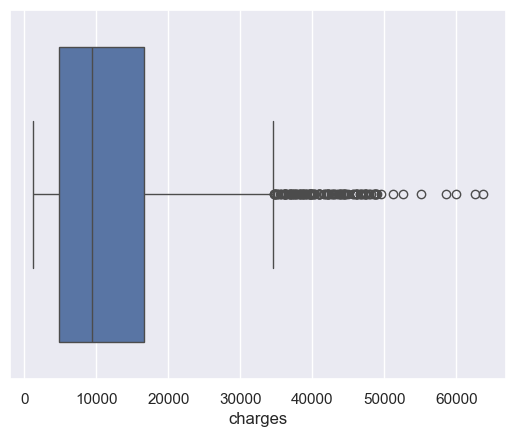

In [73]:
sns.boxplot(df, x='charges')

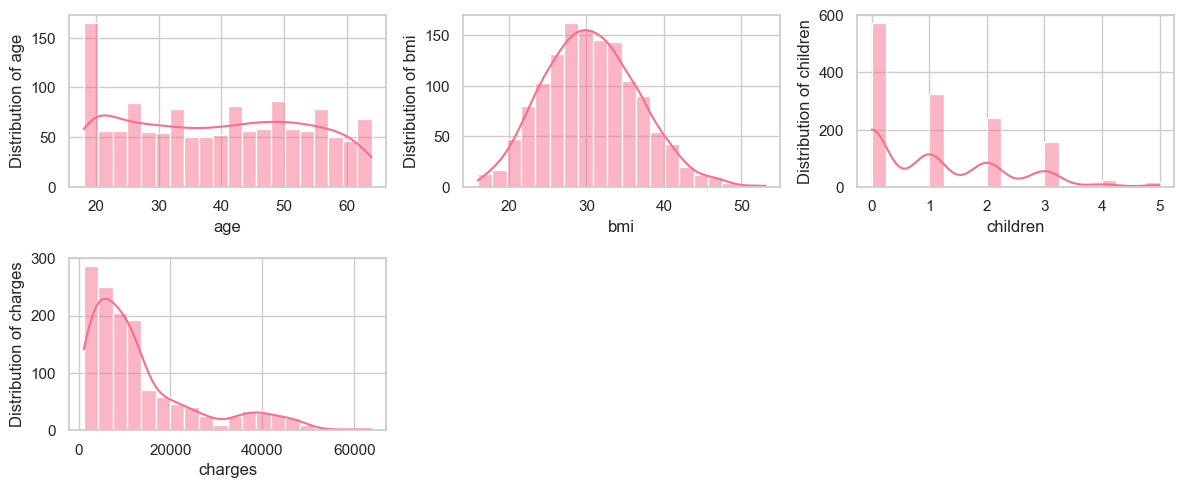

In [74]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Example to get numberic features

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Loop through numerical features
for i, column in enumerate(numerical_features, start=1):  # Use enumerate to get the index
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=20, kde=True, color="#F86E8C")
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

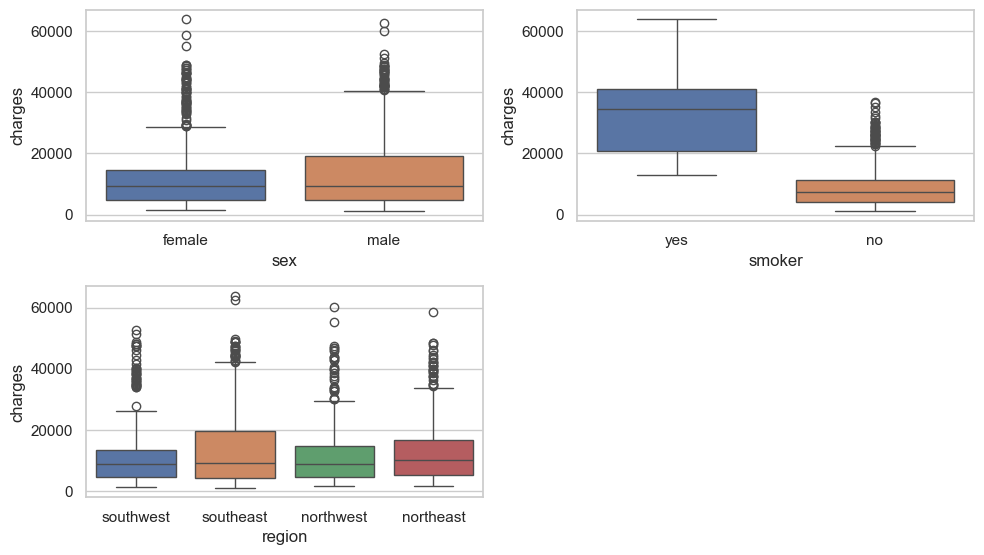

In [75]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
sns.boxplot(x = 'sex', y = 'charges', palette="deep", data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'smoker', y = 'charges', palette="deep", data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'region', y = 'charges', palette="deep", data = df)

plt.tight_layout()
plt.show()

There is a presence of outlier 

<Axes: xlabel='region', ylabel='charges'>

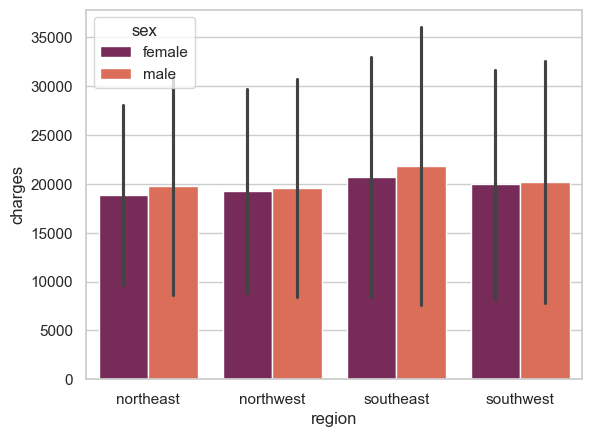

In [76]:
# Group by 'sex', 'smoker', and 'region', and sum the 'charges'
grouped_df = df.groupby(['sex', 'smoker', 'region'])['charges'].mean().reset_index()

# Display the resulting DataFrame
#grouped_df.style.background_gradient(axis=0)

sns.barplot(grouped_df, x='region', y='charges', hue='sex', palette='rocket')

 The result also showed that the customer with smoking habit pays more money than those  who do not smoke.

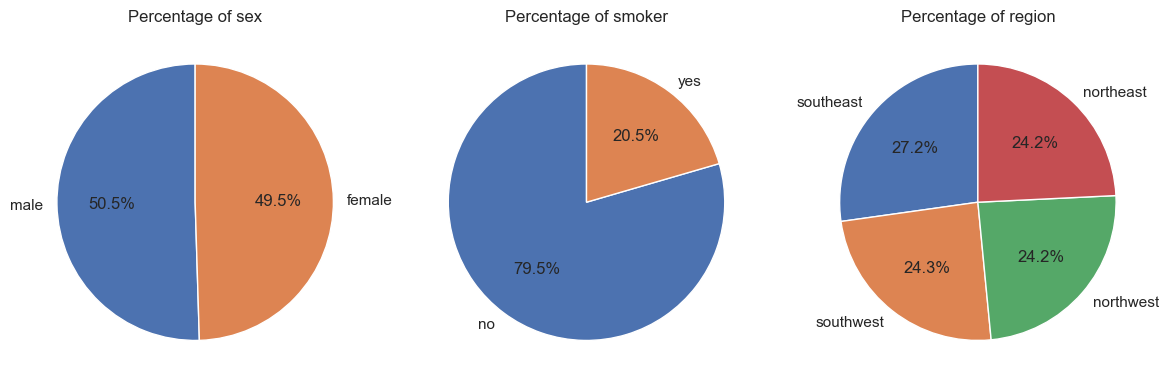

In [77]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()  # Example to get numberic features

plt.figure(figsize=(12, 12))  # Adjust figure size as needed

# Loop through categorical features
for i, c in enumerate(categorical_features, start=1):  # Use enumerate to get the index
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    s = df[c].value_counts()  # Get value counts for the categorical feature
    plt.pie(s, labels=s.index, autopct='%1.1f%%', startangle=90)  # Create pie chart
    plt.title(f'Percentage of {c}')

plt.tight_layout()
plt.show()

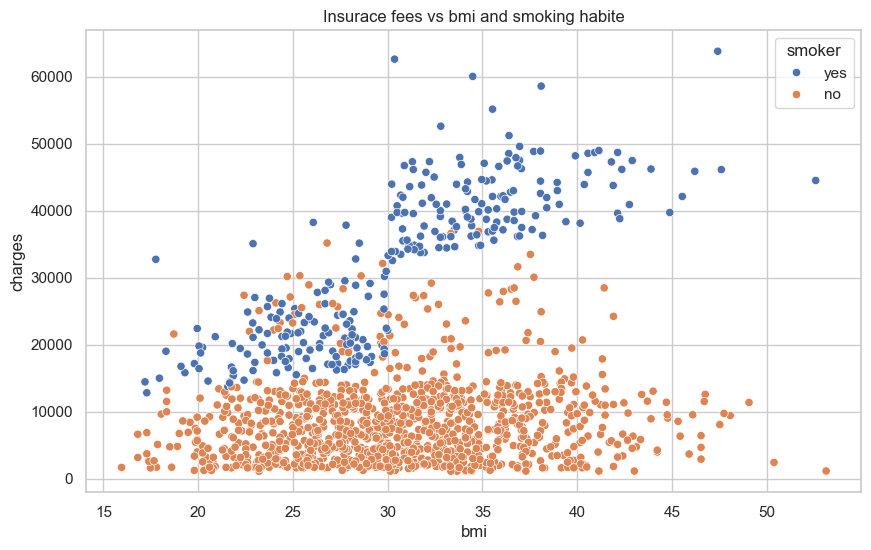

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Insurace fees vs bmi and smoking habite')
plt.show()

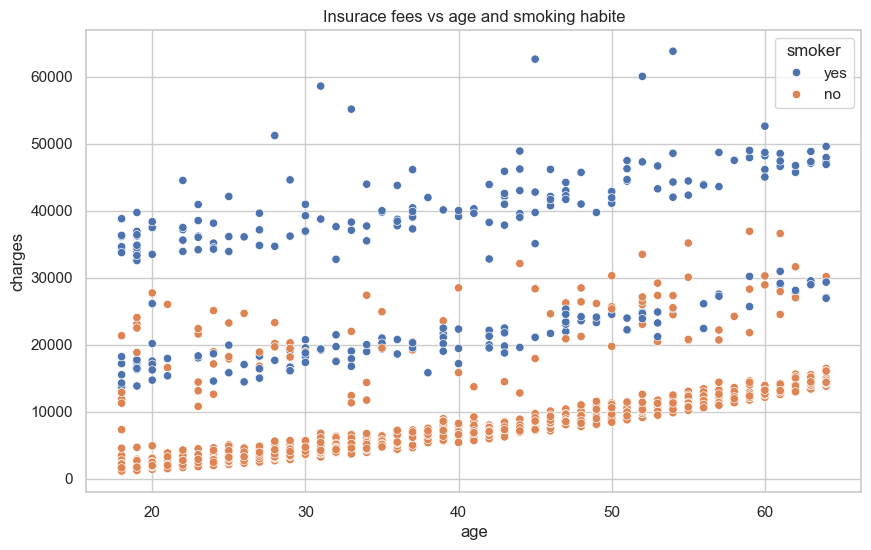

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Insurace fees vs age and smoking habite')
plt.show()

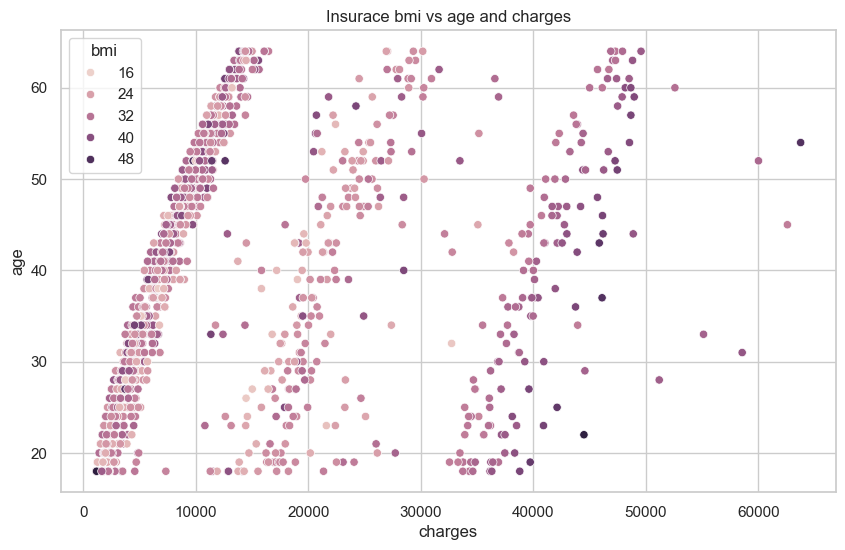

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='charges', y='age', hue='bmi')
plt.title('Insurace bmi vs age and charges')
plt.show()

## Label Encoding

Labelencoding  is a technique used in machine learning to convert categorical variables into numerical variables. It is a way to  represent categorical data in a numerical format that can be used by machine learning algorithms.  Label encoding is a type of encoding where each unique category is assigned a unique integer value.  The most common method of label encoding is the use of the `LabelEncoder` class from the  `sklearn.preprocessing` module in Python.







In [81]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [82]:
#duplication check
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

Next we'll do correlation

<Axes: >

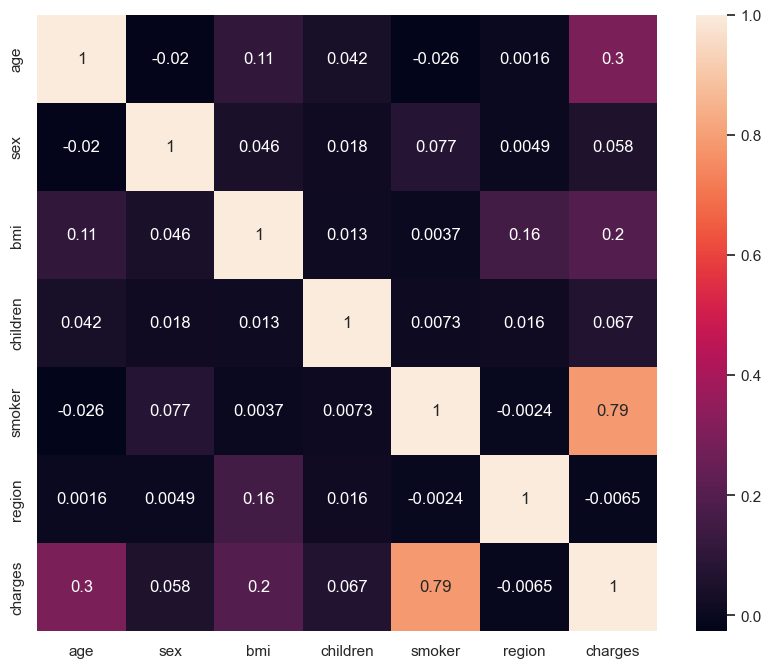

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

**Notes** :
 Charges column and smoker are 79% corraleted , which is a strong positive correlation. This means that the probability of a person being a smoker will have a high charge than the person who do not smoke. The correlation coefficient is 0.79, which is close  to 1, indicating a strong positive linear relationship between the two variables.



## Remove the outliers in the following columns

In [84]:
outliers = ['age', 'bmi', 'children', 'charges']
#remove the oulier, from 0.01 to 0.99 parcent
for c in outliers:
    Q1=df[c].quantile(0.01)
    Q3=df[c].quantile(0.99)
    df=df[df[c]<=Q3]
    df=df[df[c]>=Q1]


### Split the data  into training and testing sets.




In [85]:
X = df.drop(['charges'], axis=1)
y = df.charges
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

## 1. LinearRegression Model

In [86]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [87]:
linear_intercept = Lr.intercept_
linear_coef = Lr.coef_

Let's look at the feature important with liner_coef _ and intercept_.

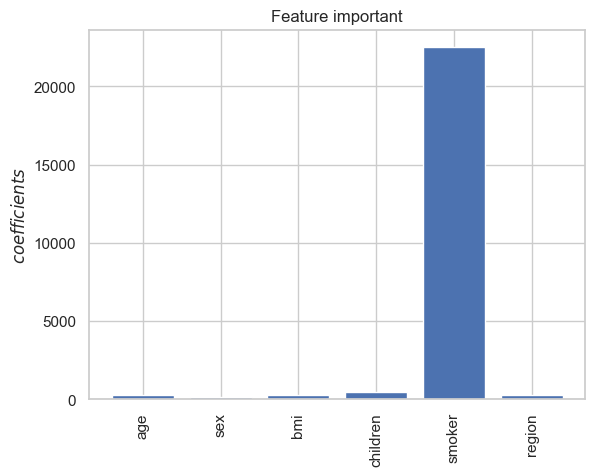

In [88]:
plt.bar(X.columns,abs(linear_coef))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.title('Feature important')
plt.show()

## Predicting and evaluation

In [89]:
y_pred = Lr.predict(X_test)
#r2_score
linear_score = metrics.r2_score(y_test, y_pred)

def Evaluation(x_test, y_test, model) :
  y_pred = model.predict(x_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print("mean_absolute_error : ", mse)
  print("mean_squared_error : ", msqe)
  print("root_mean_absolute_error : ", rmse)
  print("r2_score    : ", r2_score)



In [90]:
Evaluation(X_test, y_test, Lr)

mean_absolute_error :  3957.278659109174
mean_squared_error :  32130055.023751736
root_mean_absolute_error :  5668.337941914873
r2_score    :  0.7735794190132882


In [91]:
def compare(y_test, y_pred) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = y_pred

  return compare

In [92]:
compare(y_test, y_pred)

,Actual,Predict
867,11576.13000,16464.453754
345,6184.29940,7401.670618
700,2020.55230,4372.237662
890,29330.98315,35777.349257
262,24869.83680,33732.429250
...,...,...
888,1682.59700,5828.635510
1190,5327.40025,7507.265864
39,48173.36100,38152.702628
894,13555.00490,14714.677335


Text(0, 0.5, 'y_pred')

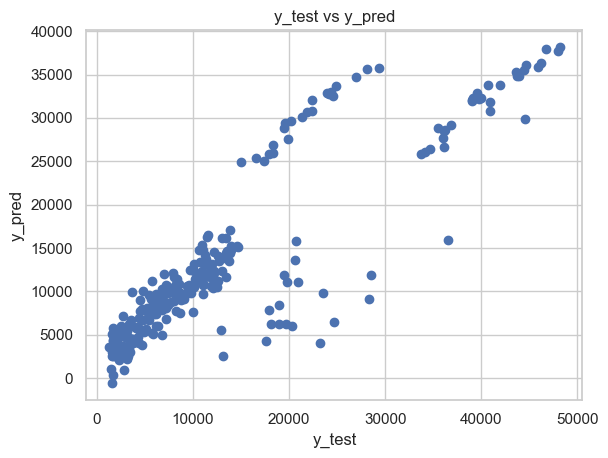

In [93]:
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

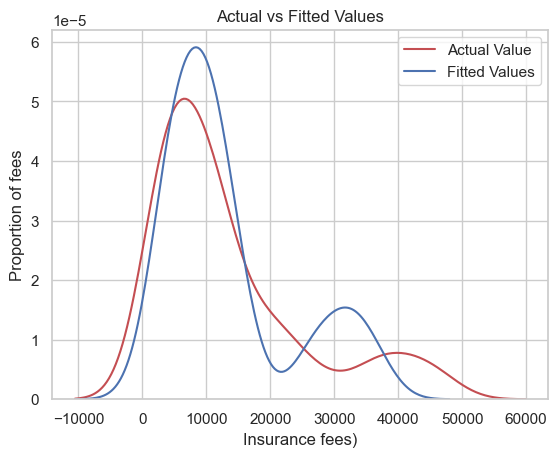

In [94]:
predicted=Lr.predict(X_test)
plot_dis(y_test,predicted)

## 2. Ridge regression
Ridge regression  is a type of linear regression that adds a penalty term to the loss function to prevent overfitting . The penalty term is proportional to the magnitude of the coefficients, which helps to reduce the impact of  noise in the data.


In [95]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, y_test))

-10718.577925598356
[  255.14943896   123.03887218   295.96959012   457.10062982
 22434.98087131  -287.14521212]
0.7733303670375773


## 3. Lasso Regression

Lasso regression  is a type of linear regression that uses L1 regularization to reduce overfitting. It adds a  penalty term to the loss function that is proportional to the absolute value of the model coefficients. This penalty  term is known as the L1 norm or L1 regularization term.

In [96]:
from scipy.stats.mstats import normaltest
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, y_test))

-10735.217689478353
[  255.26494213   114.39540716   296.09308586   456.74147231
 22499.20134093  -286.92114764]
0.7735517954214377


## 3. Polynomial regression

Polynomial regression _ is a type of regression analysis in which the relationship between the independent variable(s) and the dependent  variable is modeled using a polynomial equation of a specified degree. The degree of the polynomial is determined by  the researcher based on the nature of the data and the research question. For example, a quadratic polynomial   regression would model the relationship between the independent variable and the dependent variable using a  quadratic equation ( e.g., y = ax^2 + bx + c). The coefficients of the polynomial equation are  estimated  using a method such as least squares regression. Polynomial regression can be used to model non-linear   relationships between variables and can be useful for identifying non-linear patterns in the data. However, it   can be  sensitive to outliers and may not be suitable for large datasets.  

In [97]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [98]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.8324162797968507
R^2 on testing data: 0.8517942562645013


## 4. Random forest regression

In [99]:
# Initialize the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)  # You can adjust n_estimators

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
pred_ = model.predict(X_train)

In [100]:
Evaluation(X_test,y_test, model)

mean_absolute_error :  2648.694355148606
mean_squared_error :  21951730.98266485
root_mean_absolute_error :  4685.267439822923
r2_score    :  0.8453060948982276


In [101]:
Evaluation(X_train, y_train, model)


mean_absolute_error :  991.1878405594906
mean_squared_error :  3388730.424468564
root_mean_absolute_error :  1840.8504622778473
r2_score    :  0.9731331978041695


Compare

Text(0, 0.5, 'y_pred')

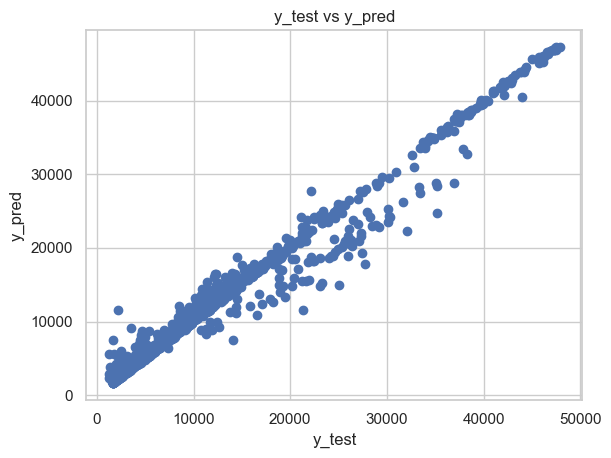

In [102]:
plt.scatter(y_train, pred_)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

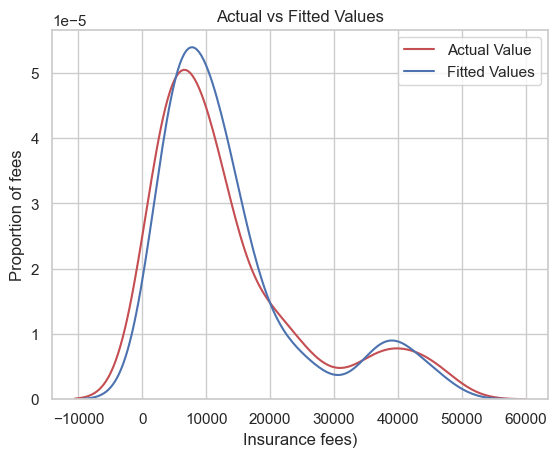

In [103]:
predicted=model.predict(X_test)
plot_dis(y_test,predicted)

Feature impotances

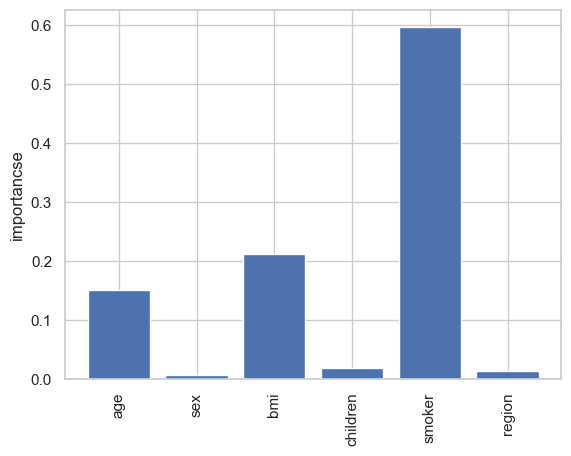

In [104]:
#feature imortance
features = model.feature_names_in_
importancse = model.feature_importances_

plt.bar(features,importancse)
plt.xticks(rotation=90)
plt.ylabel("importancse")
plt.show()

In [105]:
def compare(y_train, pred_) :
  compare = pd.DataFrame()
  compare["Actual"] = y_train
  compare["Predict"] = pred_
  compare["compare"] = abs(y_train - pred_)

  return compare

In [106]:
import pandas as pd
import numpy as np

def compare(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    df = pd.DataFrame({
        "Actual": y_true,
        "Predicted": y_pred,
        "Absolute_Error": np.abs(y_true - y_pred)
        
    })
    return df


In [107]:
compare(y_train, pred_)

,Actual,Predicted,Absolute_Error
0,42112.23560,40803.654514,1308.581086
1,11840.77505,12266.749720,425.974670
2,7626.99300,7625.660453,1.332547
3,7512.26700,8041.875155,529.608155
4,25678.77845,25845.590234,166.811784
...,...,...,...
1019,9301.89355,9477.716951,175.823401
1020,18838.70366,17135.481194,1703.222466
1021,47055.53210,46829.876791,225.655309
1022,11353.22760,12344.598342,991.370742


## 5.Xgbooster Model

In [108]:
#pip install xgboost 

In [109]:
from xgboost import XGBRegressor

# Define model with tuned hyperparameters
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

Evaluation(X_test, y_test, xgb_model)

mean_absolute_error :  3097.112021235732
mean_squared_error :  24759750.528333183
root_mean_absolute_error :  4975.917054004536
r2_score    :  0.8255179738856036


## GridSearchCV with XGBRegressor

In [110]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


# Define hyperparameter grid
param_grid = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1, 2, 5]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", rmse)


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Test RMSE: 4326.645918848985


In [111]:
# Best estimator prediction
y_pred_xgb = grid_search.predict(X_test)
Evaluation(X_test, y_test, grid_search)

mean_absolute_error :  2462.2406219488694
mean_squared_error :  18719864.90709258
root_mean_absolute_error :  4326.645918848985
r2_score    :  0.8680810635050779


In [112]:
print('Evaluation on training data:')

Evaluation(X_train, y_train, grid_search)


print('Evaluation on testing data:')

Evaluation(X_test, y_test, grid_search)

Evaluation on training data:
mean_absolute_error :  2334.2292343779145
mean_squared_error :  17218639.63548338
root_mean_absolute_error :  4149.534869775573
r2_score    :  0.863485811138144
Evaluation on testing data:
mean_absolute_error :  2462.2406219488694
mean_squared_error :  18719864.90709258
root_mean_absolute_error :  4326.645918848985
r2_score    :  0.8680810635050779


The model is doing well on the traing  data, but it's not doing well on the test data. This is a common problem in machine  learning, known as overfitting. The model is too complex and is fitting the noise in the  training data, rather than the underlying patterns. To fix this, we can try a few things:  1) reduce the number of features, 2) use regularization, 3) use a  different model.  Let's try reducing the number of features. We can use the SelectKBest  class from  sklearn.feature_selection to select the top k features.   

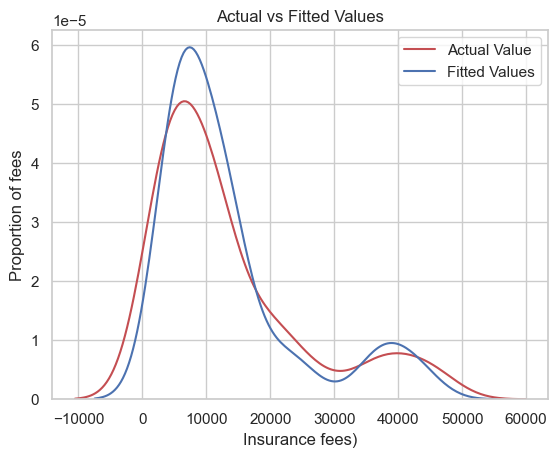

In [113]:
predicted=grid_search.predict(X_test)
plot_dis(y_test,predicted)

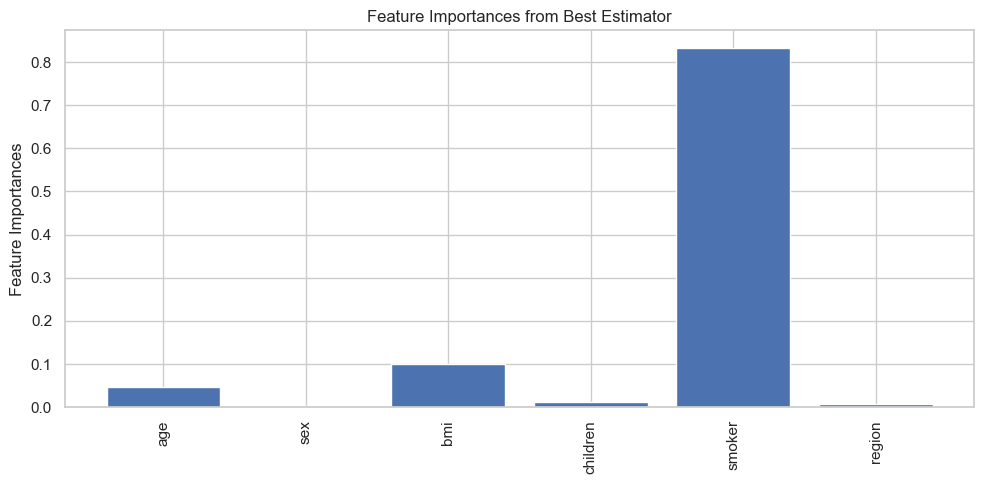

In [114]:
names = grid_search.best_estimator_.feature_names_in_
importances = grid_search.best_estimator_.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(names, importances)
plt.xticks(rotation=90)
plt.ylabel("Feature Importances")
plt.title("Feature Importances from Best Estimator")
plt.tight_layout()
plt.show()


# 6. Save the trained model

In [115]:
import joblib

joblib.dump(grid_search, "model_xgb.pkl")
print(f"Trained model pipeline saved successfully as '{grid_search}'")
print("\nRun the following command in your terminal to start the Streamlit app:")
print("streamlit run app.py")

Trained model pipeline saved successfully as 'GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_b...
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 

## Compare


In [116]:
def compare(y_test, predicted) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = predicted
  compare["compare"] = abs(y_test - predicted)
 
  return compare

#print the result
compare(y_test, predicted)

,Actual,Predict,compare
867,11576.13000,13052.942383,1476.812383
345,6184.29940,7746.788574,1562.489174
700,2020.55230,3974.570801,1954.018501
890,29330.98315,26782.644531,2548.338619
262,24869.83680,23721.298828,1148.537972
...,...,...,...
888,1682.59700,3254.777100,1572.180100
1190,5327.40025,6923.313477,1595.913227
39,48173.36100,44741.417969,3431.943031
894,13555.00490,14478.372070,923.367170


##### Predict a sample

In [117]:
X_test.iloc[165:166]

,age,sex,bmi,children,smoker,region
708,31,0,30.495,3,0,0


In [118]:
# will rondomly select the array to test the our model buld 
input_data = X.iloc[165:166]

#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = grid_search.predict(input_data_reshaped)
print('The predicted amount is',prediction)

The predicted amount is [14099.555]


## Summary

In this notebook, we explored the factors influencing insurance charges using a dataset containing demographic and health-related features. We performed extensive data cleaning, exploratory data analysis (EDA), and feature engineering, including label encoding for categorical variables and outlier removal. Several regression models were trained and evaluated, including Linear Regression, Ridge, Lasso, Polynomial Regression, Random Forest, and XGBoost. Hyperparameter tuning was performed using GridSearchCV, and model performance was assessed using metrics such as RMSE and R² score.

## Conclusion

- **Key Influencers:** Smoking status, age, and BMI were found to be the most significant factors affecting insurance charges, with smoking status showing the strongest positive correlation.
- **Model Performance:** Ensemble models like Random Forest and XGBoost outperformed linear models, achieving higher accuracy on the test set. However, some overfitting was observed, as indicated by better performance on training data compared to test data.
- **Feature Importance:** Feature importance analysis confirmed that 'smoker', 'age', and 'bmi' are the top predictors for insurance charges.

## Recommendations

1. **Feature Selection:** Consider reducing the number of features or applying regularization to further mitigate overfitting.
2. **Model Improvement:** Explore advanced ensemble methods or stacking models for potentially better generalization.
3. **Data Collection:** Collect more data or additional relevant features (e.g., medical history) to improve model robustness.
4. **Business Action:** Insurance companies should pay particular attention to applicants' smoking status, age, and BMI when assessing risk and pricing policies.
5. **Deployment:** The trained model can be deployed as a web service (e.g., using Streamlit) for real-time insurance charge prediction.



This workflow provides a solid foundation for predictive modeling in insurance pricing 